간단한 데이터를 만들어서 RNN구조를 익혀보자!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터셋 구축하기
- 5개의 단어로 문자 하나하나를 단위로 하여 RNN을 사용해보자
- hello, apple, lobby, daddy, bobby
- 문제데이터 : hell, appl, lobb, dadd, bobb
- 정답데이터 : o, e, y, y, y

In [2]:
# timesteps(순환횟수)는 4

#### 원핫인코딩으로 문자를 숫자로 변경
- 문제+정답 전체데이터에서 등장하는 문자는 h, e, l, o, a, p, b, y, d로 총 9개

In [3]:
# RNN데이터 구조파악을 위해 원핫인코딩을 직접해보자!

# 문제 데이터
X_train = np.array(
    [
     # 각각의 단어들
     [[1,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0],[0,0,1,0,0,0,0,0,0]], # h, e, l, l
     [[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,0,0,0,1,0,0,0],[0,0,1,0,0,0,0,0,0]], # a, p, p, l
     [[0,0,1,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0]], # l, o, b, b
     [[0,0,0,0,0,0,0,0,1],[0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,1]], # d, a, d, d
     [[0,0,0,0,0,0,1,0,0],[0,0,0,1,0,0,0,0,0],[0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,1,0,0]]  # b, o, b, b
     ]
)

In [4]:
# 정답 데이터
y_train = np.array(
    [[0,0,0,1,0,0,0,0,0], # o
     [0,1,0,0,0,0,0,0,0], # e
     [0,0,0,0,0,0,0,1,0], # y
     [0,0,0,0,0,0,0,1,0], # y
     [0,0,0,0,0,0,0,1,0]  # y
     ]
)

In [5]:
print(X_train.shape)
# samples(데이터 수), timesteps(순환횟수), features(데이터의 특성 수 = 원핫인코딩 된 컬럼 수)

print(y_train.shape)

(5, 4, 9)
(5, 9)


#### 출력되는 값을 알파벳 전체로 하고 싶다면 26개로 원핫인코딩을 시켜주면 됨
- 현재는 RNN의 구조를 알아보기 위해 간단히 9개의 문자로만 문제와 정답을 설정함

RNN 신경망 모델링!

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN 

In [7]:
model = Sequential()

# 입력층 + 중간층1개
# 8개의 뉴런을 가지고 있는 RNN층에서 각 뉴런이 4번씩 순환하며 한 번의 순환마다 9개의 숫자가 들어감
model.add(SimpleRNN(8,input_shape=(4,9)))

# 출력층
# 사용되는 단어가 총 9개이고 그 중에서 정답(다음에 나올 문자)을 찾아내는 것이기 때문에 다중분류!
model.add(Dense(9, activation='softmax'))

model.summary()

# RNN은 가중치가 두 종류가 있음(과거데이터의 가중치 현재데이터의 가중치)
# 현재데이터의 가중치 -> 9(입력특성) * 8(RNN층 뉴런수) + 8(RNN층 뉴런수) = 총 80개
# 과거데이터의 가중치 -> 8(RNN층 뉴런수) * 8(RNN층 뉴런수) = 총 64개
# RNN층의 순환 횟수와는 상관없이 최종적으로 출력되는 연산 결과에만 가중치가 존재하므로 8x8이됨

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 144       
                                                                 
 dense (Dense)               (None, 9)                 81        
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['acc']
              )

In [9]:
h = model.fit(X_train,y_train,epochs=300)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 1.6928 - acc: 0.4000
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 1.6792 - acc: 0.4000
Epoch 3/300
1/1 [==============================] - 0s 24ms/step - loss: 1.6656 - acc: 0.4000
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 1.6522 - acc: 0.4000
Epoch 5/300
1/1 [==============================] - 0s 18ms/step - loss: 1.6390 - acc: 0.4000
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 1.6259 - acc: 0.4000
Epoch 7/300
1/1 [==============================] - 0s 14ms/step - loss: 1.6129 - acc: 0.4000
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 1.6001 - acc: 0.4000
Epoch 9/300
1/1 [==============================] - 0s 15ms/step - loss: 1.5874 - acc: 0.4000
Epoch 10/300
1/1 [==============================] - 0s 14ms/step - loss: 1.5749 - acc: 0.4000
Epoch 11/300
1/1 [==============================] - 0s 16ms/step - loss

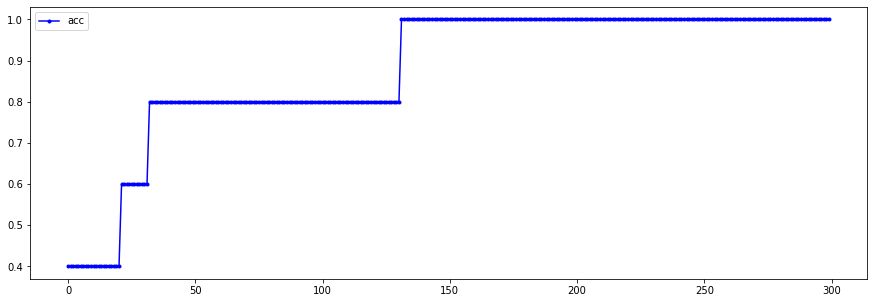

In [10]:
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc', c='blue', marker='.')

plt.legend()
plt.show()